In [1]:
cd ..

/data/a/cpac/isultan/projects/halomassloss/core_catalog_mevolved


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import subhalo_mass_loss_model as SHMLM
import genericio as gio
from itk import hist, h5_read_dict, gio_read_dict, loadpickle, plt_latex
from plot_subhalo_mass_fn import CMF, SHMF, plotCMF, plotSHMF

In [3]:
PARTICLES100MASS = 1.148276e11 #h^-1 Msun
BOXSIZE = 256

In [3]:
plt_latex()

In [4]:
# Load 2016b Figure 5 plots
fig5a = loadpickle("Notebooks/2016b_fig5a.p") #[12,12.5]
fig5b = loadpickle("Notebooks/2016b_fig5b.p") #[13,13.5]
fig5c = loadpickle("Notebooks/2016b_fig5c.p") #[14,14.5]
fig5 = {12:fig5a, 13:fig5b, 14:fig5c}

In [5]:
def fig5_plot(M1):
    """Plot 2016B Figure 5 plot of M range [M1, M1+0.5]."""
    plotsd = fig5[np.log10(M1)]
    for k in plotsd.keys():
        plt.plot(plotsd[k][:,0][np.argsort(plotsd[k][:,1])], plotsd[k][:,1][np.argsort(plotsd[k][:,1])], '-', label=k, alpha=0.7)

/home/isultan/projects/itk/itk.py:75: RuntimeWarning: divide by zero encountered in log10
  cnts = np.log10(cnts)
/home/isultan/.local/lib/python2.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


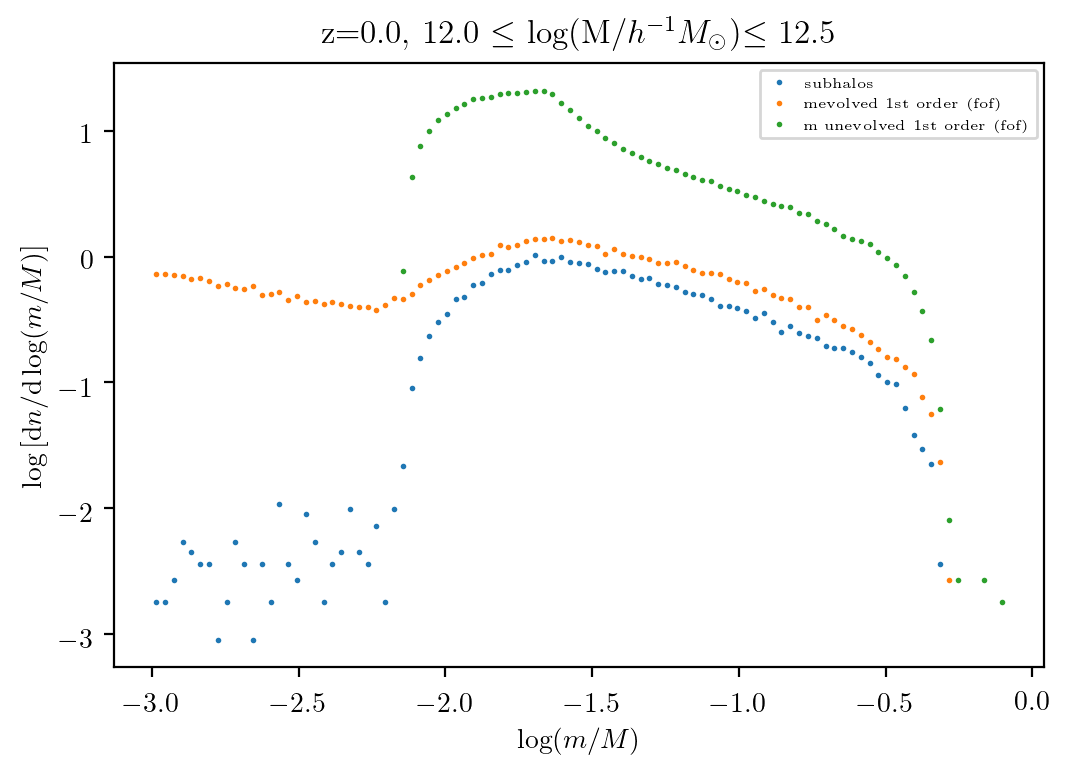

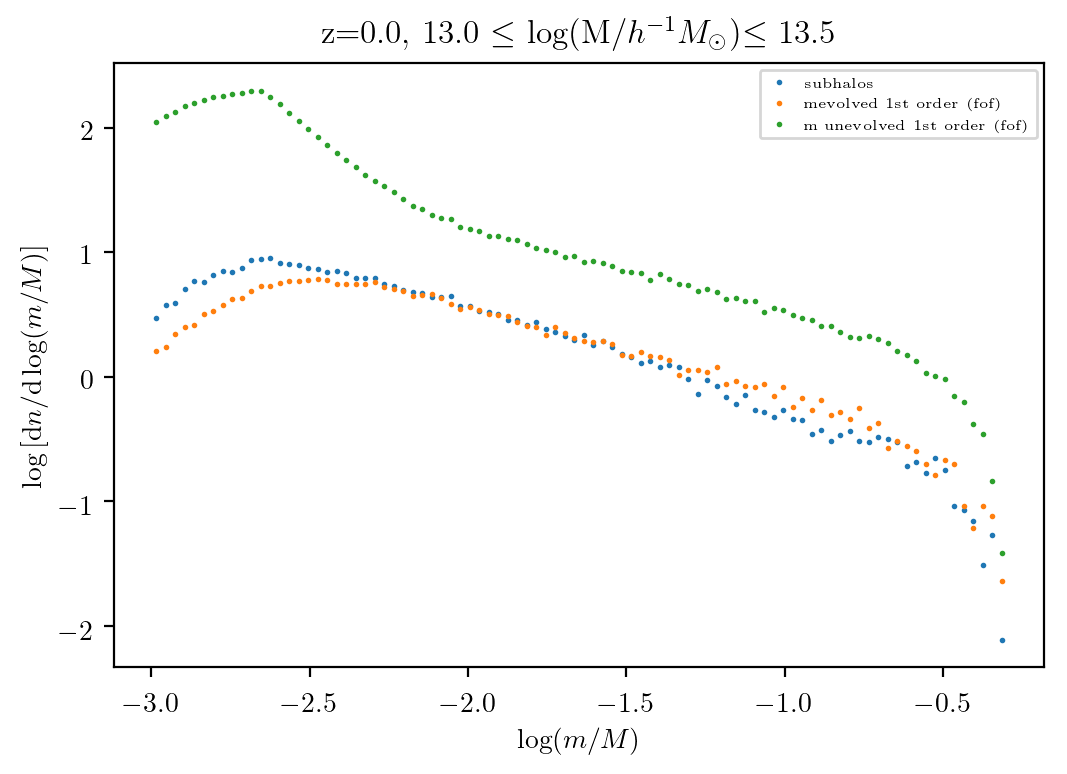

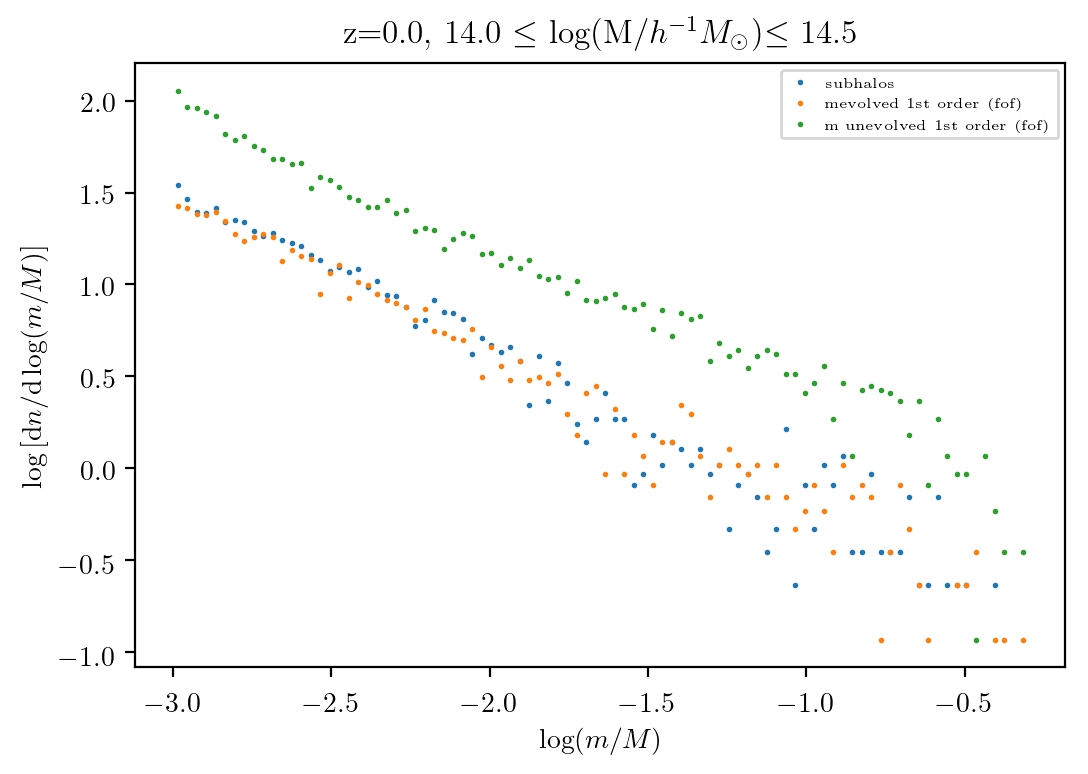

In [6]:
step=499
rall = {12:-4,13:-5,14:-6}
for M1 in [12.,13.,14.]:
#     r = (rall[M1], 0)
    r = (-3,0)
    
    M2 = M1 + 0.5
    M1 = 10**M1
    M2 = 10**M2

    plt.figure(dpi=200)
    plotSHMF(M1, M2, r)
    
#     plotCMF('output_merg_virial/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=True, returnUnevolved=False, label='mevolved 1st order (virial)', r=r)
#     plotCMF('output_merg_virial/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=False, returnUnevolved=False, label='mevolved all (virial)', r=r)
    plotCMF('output_merg_fof/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=True, disrupt=True, returnUnevolved=False, label='mevolved 1st order (fof)', r=r)
#     plotCMF('output_merg_fof/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=False, returnUnevolved=False, label='mevolved all (fof)', r=r)
    
    plotCMF('output_merg_fof/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=True, disrupt=False, returnUnevolved=True, label='m unevolved 1st order (fof)', r=r)
#     plotCMF('output_merg_fof/09_03_2019.AQ.499.corepropertiesextend.hdf5', M1, M2, s1=False, returnUnevolved=True, label='m unevolved all (fof)', r=r)

#     fig5_plot(M1)

    plt.xlabel(r'$\log(m/M)$')
    plt.ylabel(r'$\log \left[ \mathrm{d}n/\mathrm{d} \log(m/M) \right]$')
    plt.title( 'z=' + str(round(SHMLM.step2z[step],3)) + r', {} $\leq$ log(M/$h^{{-1}}M_\odot$)$\leq$ {}'.format(np.log10(M1),np.log10(M2)) );
    plt.legend(prop={'size': 5})

In [35]:
bhp = gio_read_dict('/home/isultan/data/AlphaQ/big_halo_prtcls2/m000-499.bighaloparticles', ['fof_halo_tag', 'x', 'y', 'z'])
sh = gio_read_dict('/home/isultan/data/AlphaQ/subhalos/m000-499.subhaloproperties', ['fof_halo_tag','subhalo_mean_x','subhalo_mean_y','subhalo_mean_z','subhalo_count', 'subhalo_tag'])
cc = gio_read_dict('/home/isultan/data/AlphaQ/core_catalog_merg/09_03_2019.AQ.499.coreproperties', ['fof_halo_tag', 'x', 'y', 'z', 'radius', 'infall_mass', 'central', 'host_core', 'core_tag'])

In [45]:
def subhalo_core_plot(fht, saveFlag=False):
    fig=plt.figure(dpi= 120)
    
    cc_halo = { k:cc[k][cc['fof_halo_tag']==fht].copy() for k in ['fof_halo_tag', 'x', 'y', 'z', 'radius', 'infall_mass', 'central', 'host_core', 'core_tag'] }
    
    central_idx = np.flatnonzero(cc_halo['central']==1)
    assert len(central_idx)==1
    fhm = cc_halo['infall_mass'][ central_idx ][0]
    central_coretag = cc_halo['core_tag'][central_idx][0]
    
#     cc_halo_mask = (cc_halo['infall_mass']>=PARTICLES100MASS)&(cc_halo['radius'] < 20e-3)&(cc_halo['central']!=1)&(cc_halo['host_core']==central_coretag)
    cc_halo_mask = (cc_halo['radius'] < 20e-3)&(cc_halo['central']!=1)&(cc_halo['host_core']==central_coretag)
    
    cc_halo = { k:cc_halo[k][cc_halo_mask].copy() for k in ['x', 'y', 'z'] }
    sh_halo = { k:sh[k][(sh['fof_halo_tag']==fht)&(sh['subhalo_tag']!=0)].copy() for k in ['subhalo_mean_x', 'subhalo_mean_y', 'subhalo_mean_z'] }
    bhp_halo = { k:bhp[k][bhp['fof_halo_tag']==fht].copy() for k in ['x', 'y', 'z'] }
    
    if len(cc_halo['x']) > 1:
        x_ref, y_ref = cc_halo['x'][0], cc_halo['y'][0]
        # periodic boundary conditions core mask
        cc_halo['x'] += BOXSIZE*((cc_halo['x']-x_ref)<-(BOXSIZE/2)) + -BOXSIZE*((cc_halo['x']-x_ref)>(BOXSIZE/2))
        cc_halo['y'] += BOXSIZE*((cc_halo['y']-y_ref)<-(BOXSIZE/2)) + -BOXSIZE*((cc_halo['y']-y_ref)>(BOXSIZE/2))
        # periodic boundary conditions subhalo mask
        sh_halo['subhalo_mean_x'] += BOXSIZE*((sh_halo['subhalo_mean_x']-x_ref)<-(BOXSIZE/2)) + -BOXSIZE*((sh_halo['subhalo_mean_x']-x_ref)>(BOXSIZE/2))
        sh_halo['subhalo_mean_y'] += BOXSIZE*((sh_halo['subhalo_mean_y']-y_ref)<-(BOXSIZE/2)) + -BOXSIZE*((sh_halo['subhalo_mean_y']-y_ref)>(BOXSIZE/2))
        # periodic boundary conditions bhp mask
        bhp_halo['x'] += BOXSIZE*((bhp_halo['x']-x_ref)<-(BOXSIZE/2)) + -BOXSIZE*((bhp_halo['x']-x_ref)>(BOXSIZE/2))
        bhp_halo['y'] += BOXSIZE*((bhp_halo['y']-y_ref)<-(BOXSIZE/2)) + -BOXSIZE*((bhp_halo['y']-y_ref)>(BOXSIZE/2))

    counts, xbins, ybins = np.histogram2d(bhp_halo['x'], bhp_halo['y'], bins=100)
    plt.pcolormesh(xbins, ybins, counts.T, cmap='Greys', norm=matplotlib.colors.LogNorm());
    plt.colorbar();

    plt.scatter(cc_halo['x'], cc_halo['y'], s=100, facecolors='none', edgecolors='r', label='Cores')
    plt.scatter(sh_halo['subhalo_mean_x'], sh_halo['subhalo_mean_y'], marker='x', c='b', label='Subhalos');
   
    plt.title(r'z=0, fof halo mass={}'.format(np.format_float_scientific(fhm)))
    plt.xlabel('x [$\mathrm{h^{-1}\ Mpc}$]')
    plt.ylabel('y [$\mathrm{h^{-1}\ Mpc}$]')
    plt.legend(loc=0);
    if saveFlag:
        plt.savefig('Notebooks/figs/figure{}.png'.format(fht))
        plt.close(fig)

In [49]:
for fht in [1040287332,  757527166,  472937720,  802574311,  621261511,38685933,  112886331,  141272803,  245352048,  182027995]:
    subhalo_core_plot(fht, saveFlag=True)